# Task 1: Predicting Student Scores Using Supervised ML

**Author: Hadeel Yasser**


Task description: the aim of this task is to build a linear regression model using machine learning to help in determing the relation between hours studied and a student's score which in the end could be used to build predictions

In [1]:
# importing all needed libararies to perform predictions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Step 1: Import the Data**

In [3]:
# store the csv file into a string then pass it to the function read_csv to load data

filePath=r'C:\Users\EGYPT_LAPTOP\Desktop\New Courses\GRIP-Data analysis\Task1_Linear Regression\student_scores.csv'
studentData= pd.read_csv(filePath)
print(studentData)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
 # the head function returns the first 5 values, passing a parameter can define how many values to return
new_StudentData=studentData.head(15)
print(new_StudentData)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17


**Step 2: visualize the imported data**

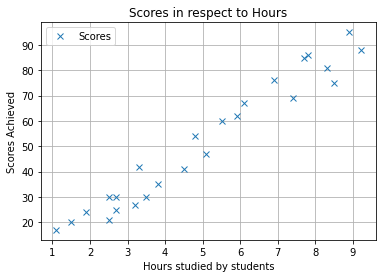

In [6]:
# plotting the imported data using matplotlib

studentData.plot(x="Hours", y="Scores", style='x')
plt.title("Scores in respect to Hours")
plt.xlabel("Hours studied by students")
plt.ylabel("Scores Achieved")
plt.grid()
plt.show()

In [7]:
# determine the correlation between the dependent and independent variables

print(studentData.corr()) # output shows a positive correlation

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**Step 3: Prepare the data**


In [10]:
# divide the data into input data (independent) and output data (dependent)
 # store the x values (hours) 'independent' in a list, extract from csv. Same goes for the dependent values

independent= studentData.iloc[:,0:1].values # 0 is the start column, 1 end column to select values upon
print("X: independent variable","\n",independent)
dependent = studentData.iloc[:,1:2].values
print("Y: dependent variable","\n",dependent)

X: independent variable 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y: dependent variable 
 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [12]:
# split data into training and testing data by using Scikit-Learn (because there is only 1 dataset to test )
 # (the accuracy of the predictiont, there doesn't exist another dataset that could be used for testing)

x_train, x_test, y_train, y_test= train_test_split(independent,dependent,train_size=None, test_size=0.25, random_state=0) 
print("\n")
print ("X_train: ", x_train) 
print("\n")
print ("y_train: ", y_train)
print("\n")
print("X_test: ", x_test) #  testing data in hours
print("\n")
print ("y_test: ", y_test) # testing data in scores
print("\n")



X_train:  [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


y_train:  [[86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]]


X_test:  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


y_test:  [[20]
 [27]
 [69]
 [30]
 [62]
 [35]
 [24]]




**Step 4: Training the algorithm**

In [13]:
# create a linearRegression object that would store the to be fitted data
regressor= LinearRegression()

  # train the model using the training data sets
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


**Step 5: Visualizing the training model**

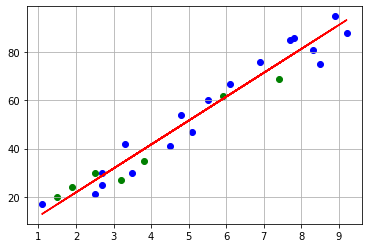

In [15]:
# defining the regression line (coef is the x values, intercept as in Y intercept)
regressionLine= regressor.coef_*independent + regressor.intercept_

  # plotting the training dataset and the regression line
plt.scatter(x_train,y_train, color='blue')
plt.plot(independent,regressionLine,color='red')
plt.grid()
  # Plotting testing data then displaying both train and test data
plt.scatter(x_test,y_test, color='green')
plt.show()

**Step 6: Data Prediction**

In [17]:
 # predict the scores based on the number of hours in the testing data
scoresPrediction= regressor.predict(x_test)
print(scoresPrediction)
print("\n")
  # comparing predicted scores with actual by using pandas

d1 = dict(enumerate(y_test.flatten(), 1)) # store the nparray in a dictionary
d2=dict(enumerate(scoresPrediction.flatten(), 1))
table= pd.DataFrame({'Actual': d1, 'Predicted': d2})
print(table)

[[16.84472176]
 [33.74557494]
 [75.50062397]
 [26.7864001 ]
 [60.58810646]
 [39.71058194]
 [20.8213931 ]]


   Actual  Predicted
1      20  16.844722
2      27  33.745575
3      69  75.500624
4      30  26.786400
5      62  60.588106
6      35  39.710582
7      24  20.821393


In [18]:
# test the model with your own data
newHours=9.25
myPrediction= regressor.predict([[newHours]])
print("Number of Hours Studied =",newHours, "will result in a Score of", myPrediction[0])

Number of Hours Studied = 9.25 will result in a Score of [93.89272889]


**Step 7: Model Evaluation**

In [19]:
 # Evaluate the effectivness of the Linear Regression Model
 # mean square error metric will be used as a measure of accuracy
error= metrics.mean_absolute_error(y_test,scoresPrediction)
print("The mean absolute error of this model is",error)

The mean absolute error of this model is 4.130879918502486
